# Extended Data Fig. 1 The expression profile of cross-species conserved NPC marker genes. 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
#import scvi

from glob import iglob
from tqdm import tqdm
import scanpy as sc

In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
import pickle

In [4]:
from glob import iglob 

In [5]:
from scipy.stats import median_abs_deviation

In [6]:
from scAnnot.tools import *

In [50]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Read in

In [17]:
with open(f'data/hipngs/hm3f4a_noBr_hip_integration_rmPyr_Micro_qc1_reharmony_anno_final1.pickle', 'rb') as handle:
    ad=pickle.load(handle)

In [18]:
ad.X=ad.X.todense()

In [19]:
label={
'Oligodendrocytes':'Oligodendrocyte', 
'Granule':'Glutamatergic', 
'Astrocytes':'Astrocyte', 
'OPC':'Oligodendrocyte precursor',
'Neuroblast':'Neuroblast', 
'GABA':'GABAergic', 
'ImGranule':'Immature Glutamatergic', 
'CA neurons':'CA neurons',
'Endothelial':'Endothelial', 
'NFOL':'Newly formed oligodendrocyte', 
'NPC':'Neural progenitor'
}

In [20]:
ad.obs['anno1'] = ad.obs['anno'].replace(label)

In [12]:
study={'Hochgerner2018':'Hochgerner et al.', 
       'Zhong2020':'Zhong et al.', 
       'Yi2022': 'Zhou et al.', 
       'Tran2021': 'Tran et al.', 
       'Fatma2020':'Ayhan et al.', 
       'Franjic2021':'Franjic et al.'}
ad.obs['study']=ad.obs['study'].replace(study)

## Extended Data Fig. 1a
- UMAP plots show the distribution of normalised expression for each gene. The intensity of the colour indicates the expression level. 

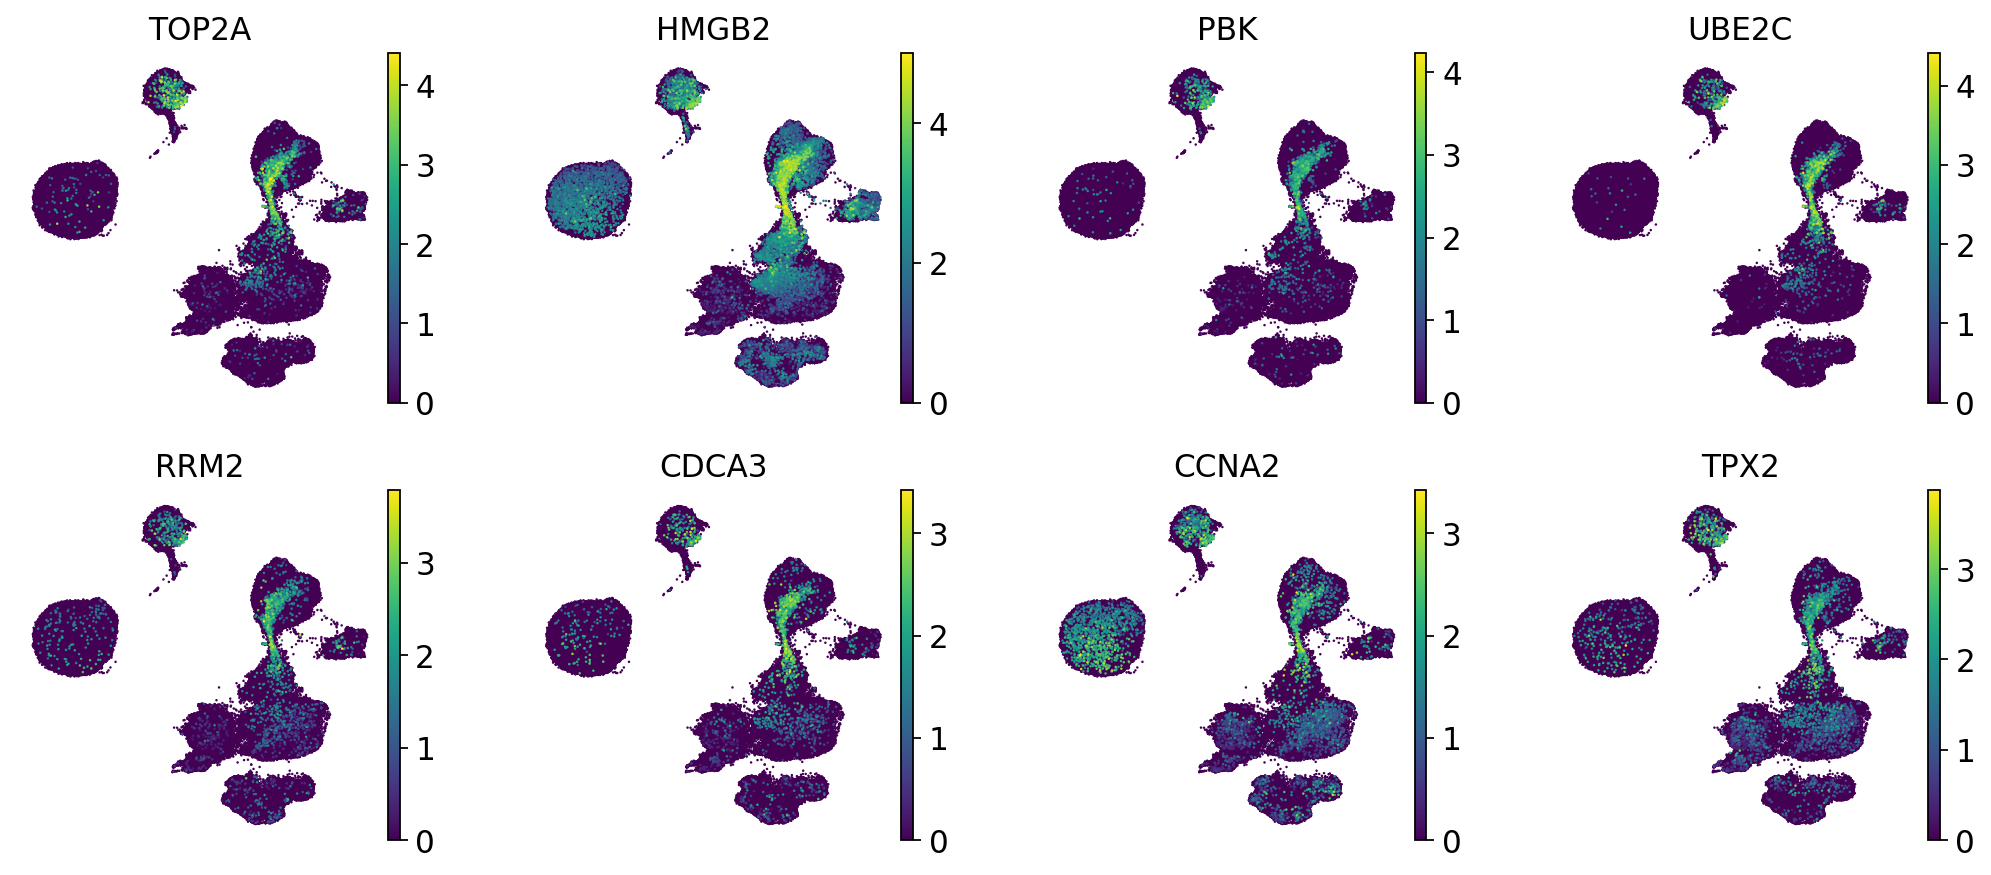

In [25]:
figsize(3,3)
sc.pl.umap(ad,color=genes,ncols=4,size=5,frameon=False,save='ext1a.pdf')

## Extended Data Fig. 1b
- The dot plot shows the expression levels of these genes in different cell types. The intensity of the colour indicates the expression level. Size represents the proportion of cells expressing the gene. 

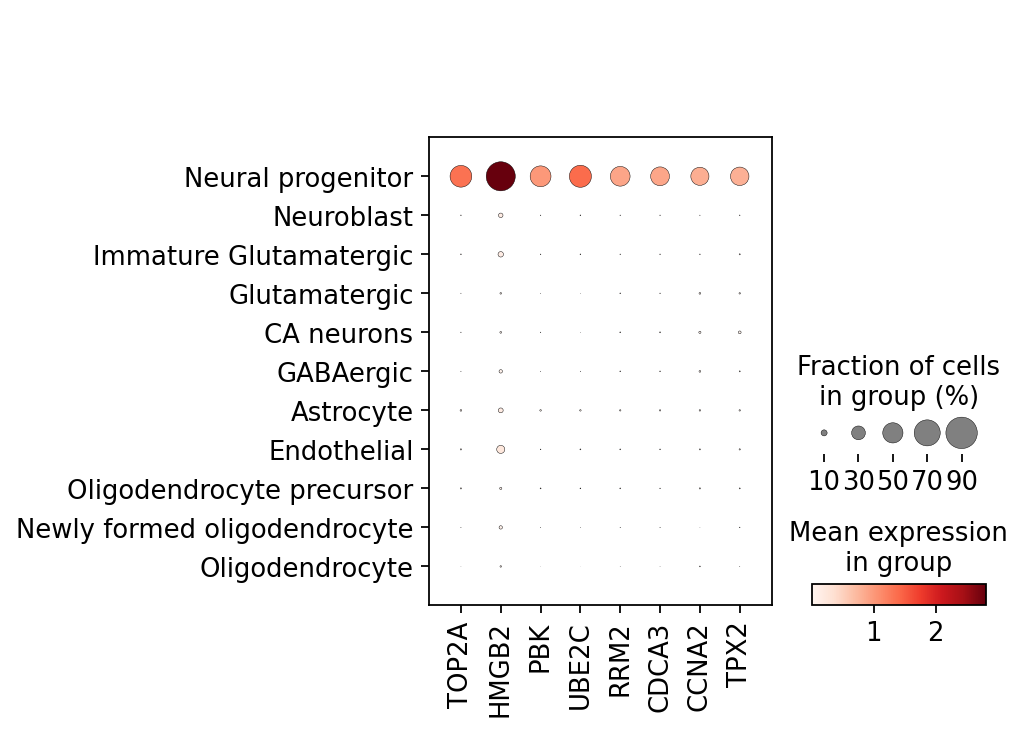

In [24]:
sc.pl.dotplot(ad,genes,'anno1',save='ext1b.pdf')

## Extended Data Fig. 1c
- The distribution of NPC gene module scores in different cell types.

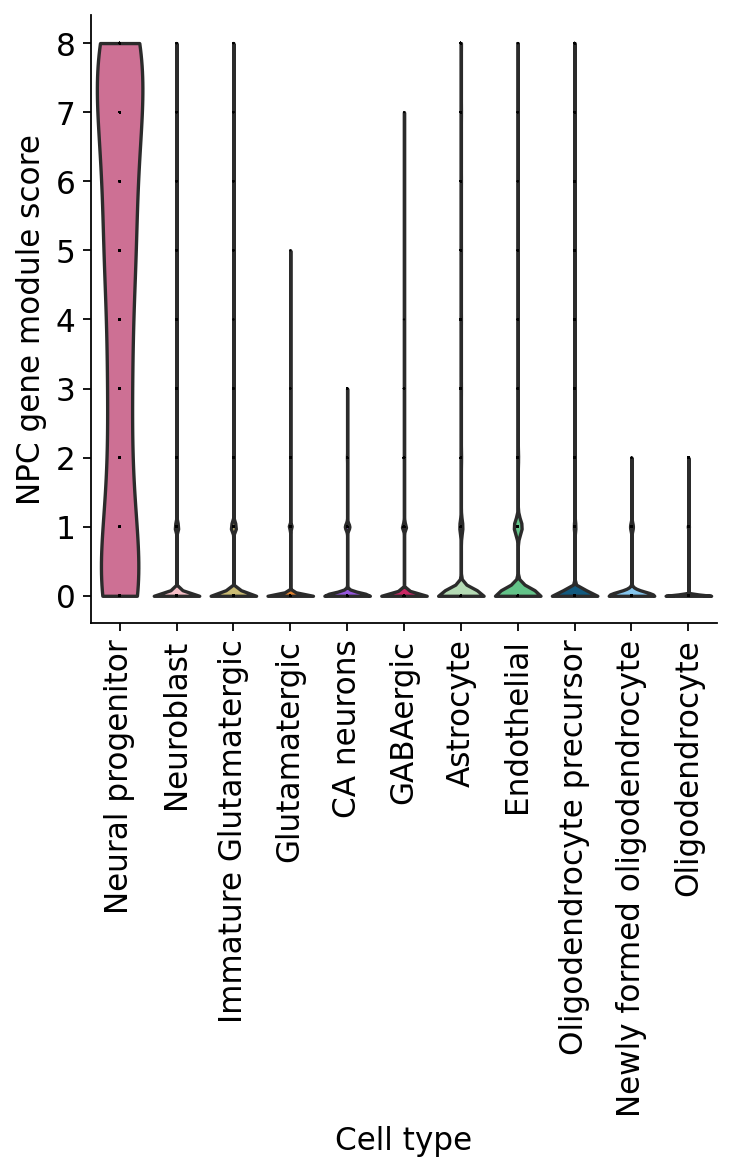

In [112]:
figsize(5,5)
sc.pl.violin(ad,'exp_Total',groupby='anno1',rotation=90,ylabel='NPC gene module score',xlabel='Cell type',save='NPC_score_dist.pdf',jitter=False)